In [1]:
import pandas as pd
import numpy as np

from datetime import datetime


import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

import plotly.graph_objects as go

import plotly.io as pio

import plotly

sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', None)

C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\4178653954.py:8: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\4178653954.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Data set cleaned for Covid-19 modelling

Goal of the exercise a dynamic dashboard of the last cell in the notebook, where one can select the fit for different countries

Fit of SIR model for Italy cases

In [2]:
df_analyse=pd.read_csv('../data/processed/COVID_small_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True)

,date,Spain,France,Germany,Turkey,Italy
0,2020-01-22,0,0,0,0,0
1,2020-01-23,0,0,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,3,0,0,0
4,2020-01-26,0,3,0,0,0
5,2020-01-27,0,3,1,0,0
6,2020-01-28,0,4,4,0,0
7,2020-01-29,0,5,4,0,0
8,2020-01-30,0,5,4,0,0
9,2020-01-31,0,5,5,0,2


In [3]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

## beta/gamma is the basic reproduction number, <1 means no spread virus


# condition I0+S0+R0=N0
I0=df_analyse.Italy[32]
S0=N0-I0
R0=0

In [4]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

## Simulative approach to calculate SIR curves

In [5]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

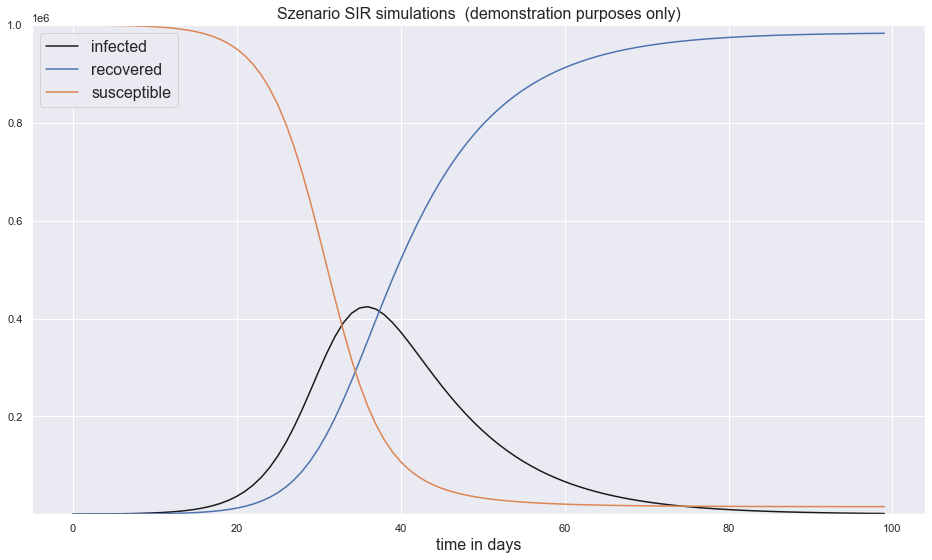

In [6]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

## Fitting data to a model

step one: always start on simulative / constructive data  
step two: cross check if the innerlogic of your parameter fitting is correct

In [7]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [8]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [9]:
## fit the data set ydata, here the simulative data set of the infected curve

ydata = propagation_rates.infected
t=np.arange(len(ydata))

In [10]:
ydata

0         201.49039
1        261.920018
2        340.464848
3        442.549514
4        575.219055
5        747.620175
6        971.623542
7       1262.627105
8       1640.590885
9       2131.366139
10      2768.396288
11      3594.882791
12      4666.524872
13      6054.954338
14      7851.989748
15     10174.817138
16     13172.149205
17     17031.292007
18     21985.812636
19     28323.088044
20     36390.339422
21     46596.726606
22     59407.635508
23     75325.512699
24     94849.872914
25    118408.406164
26    146253.286569
27    178324.492699
28    214097.590798
29     252456.28666
30    291651.931653
31    329415.212226
32    363249.203817
33    390855.798789
34    410565.267396
35    421612.932525
36    424170.752481
37     419156.67413
38    407930.780365
39    391997.818225
40     372789.12131
41    351540.706343
42    329249.269909
43    306677.343526
44    284382.839903
45     262756.59716
46    242058.985127
47    222451.659022
48    204023.386721
49    186810.249494


In [11]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\2340960649.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I
C:\Users\Viper\AppData\Local\Temp\ipykernel_10768\2340960649.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\Viper\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00092592 0.00068298]  start infect: 201.49039
Optimal parameters: beta = 0.37752128946957914  and gamma =  0.09650066245433457


In [12]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

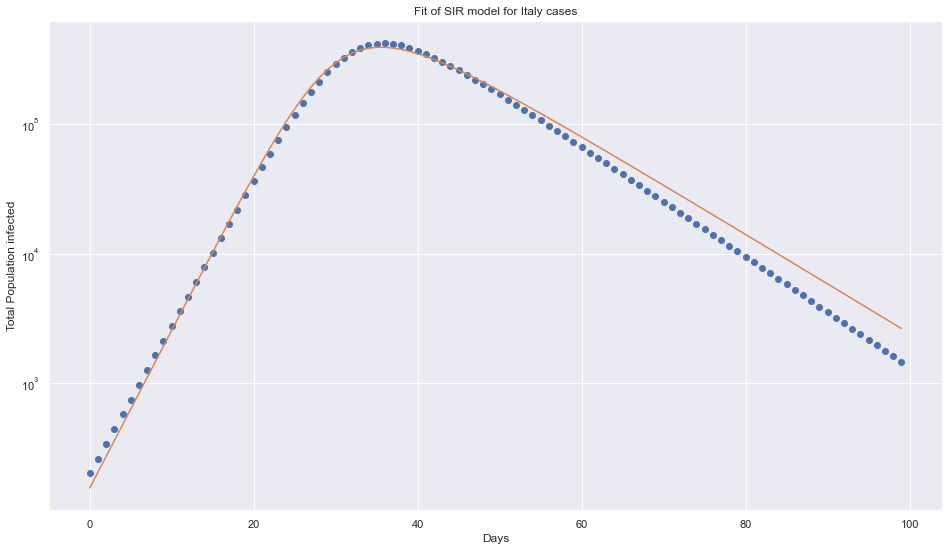

Optimal parameters: beta = 0.37752128946957914  and gamma =  0.09650066245433457
Basic Reproduction Number R0  3.9121108588060456


In [13]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
#plt.semilogy(fitted)

plt.title("Fit of SIR model for Italy cases")
plt.ylabel("Total Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

## Fitting the parameters of SIR model

In [14]:
## slice out some true data of a country

it_data = np.array(df_analyse.Italy[32:132])
time=np.arange(len(it_data))

In [15]:
sp_data = np.array(df_analyse.Spain[41:141])
fr_data = np.array(df_analyse.France[39:139])
ger_data = np.array(df_analyse.Germany[40:140])
tr_data = np.array(df_analyse.Turkey[57:157])

In [16]:
# ensure re-initialization 
# attenion when slicing gout only a time window 
# (one Corana wave) the overall N0 is not the full popoulation size 
N0=10000000

I0=it_data[0]
S0=N0-I0
R0=0
print('start infected:',I0)
print('cumulative sum of infected after period',it_data[-1])
print('Number of days',len(it_data))
print('N0',N0)

start infected: 155
cumulative sum of infected after period 233197
Number of days 100
N0 10000000


In [17]:
## get the model parameters / fit the model
popt, pcov = optimize.curve_fit(fit_odeint, time, it_data)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',it_data[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
Italey_fitted=fit_odeint(time, *popt)

standard deviation errors :  [0.01088828 0.01063413]  start infect: 155
Optimal parameters: beta = 0.5034128290725066  and gamma =  0.38806005658805504


In [18]:
popt, pcov = optimize.curve_fit(fit_odeint, time, sp_data)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',sp_data[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
Spain_fitted=fit_odeint(time, *popt)

standard deviation errors :  [0.01319429 0.01295821]  start infect: 165
Optimal parameters: beta = 0.5020421432149227  and gamma =  0.3823970979281286


In [19]:
popt, pcov = optimize.curve_fit(fit_odeint, time, fr_data)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',fr_data[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
France_fitted=fit_odeint(time, *popt)

standard deviation errors :  [0.0116888  0.01145477]  start infect: 130
Optimal parameters: beta = 0.5445835812809167  and gamma =  0.4297604962768399


In [20]:
popt, pcov = optimize.curve_fit(fit_odeint, time, ger_data)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ger_data[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
Germany_fitted=fit_odeint(time, *popt)

standard deviation errors :  [0.01056406 0.00983701]  start infect: 150
Optimal parameters: beta = 0.5532370018576646  and gamma =  0.4388673419066605


In [21]:
popt, pcov = optimize.curve_fit(fit_odeint, time, tr_data)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',tr_data[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
Turkey_fitted=fit_odeint(time, *popt)

standard deviation errors :  [0.0142851  0.01393556]  start infect: 192
Optimal parameters: beta = 0.5484356568318584  and gamma =  0.43701054749732143


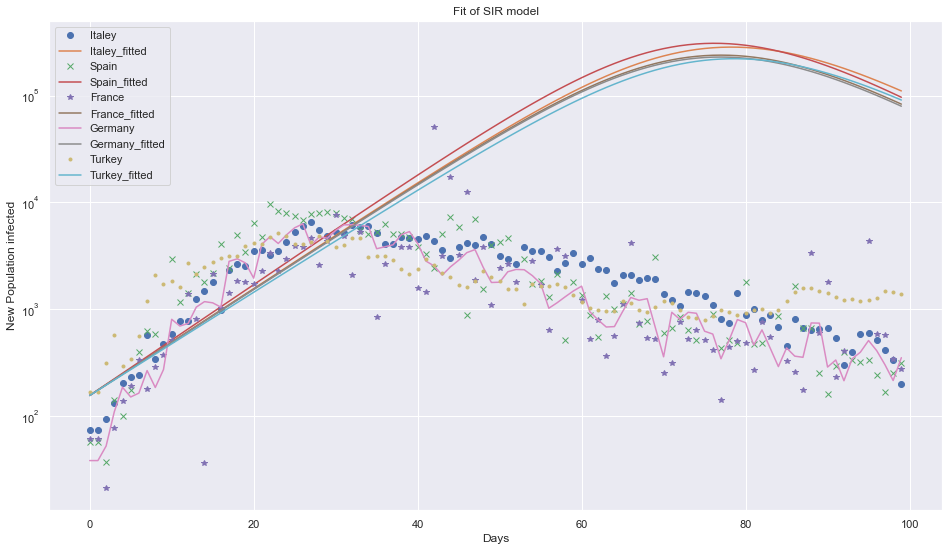

In [22]:
# option 1: ydata is cummulative, thus we need cumulative fitted line
#plt.semilogy(t, ydata, 'o') 
#plt.semilogy(t, np.cumsum(fitted))


# option2: ydata is cummulative, however we would like to have the day to day difference
plt.semilogy(time,np.ediff1d(it_data, to_begin=it_data[1]-it_data[0]), 'o', label='Italey')
plt.semilogy(time, Italey_fitted, label='Italey_fitted')

plt.semilogy(time,np.ediff1d(sp_data, to_begin=sp_data[1]-sp_data[0]), 'x', label= 'Spain')
plt.semilogy(time, Spain_fitted, label='Spain_fitted')

plt.semilogy(time,np.ediff1d(fr_data, to_begin=fr_data[1]-fr_data[0]), '*',label='France')
plt.semilogy(time, France_fitted, label='France_fitted')

plt.semilogy(time,np.ediff1d(ger_data, to_begin=ger_data[1]-ger_data[0]), '-',label='Germany')
plt.semilogy(time, Germany_fitted,label='Germany_fitted')

plt.semilogy(time,np.ediff1d(tr_data, to_begin=tr_data[1]-tr_data[0]), '.',label='Turkey')
plt.semilogy(time, Turkey_fitted,label='Turkey_fitted')

plt.title("Fit of SIR model")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
#print("Optimal parameters: beta =", popt[0], " and gamma =", popt[1])
#print("Basic Reproduction Number R0 =", popt[0]/ popt[1])

In [23]:
Italey_diff=np.ediff1d(it_data, to_begin=it_data[1]-it_data[0])
Spain_diff=np.ediff1d(sp_data, to_begin=sp_data[1]-sp_data[0])
France_diff=np.ediff1d(fr_data, to_begin=fr_data[1]-fr_data[0])
Germany_diff=np.ediff1d(ger_data, to_begin=ger_data[1]-ger_data[0])
Turkey_diff=np.ediff1d(tr_data, to_begin=tr_data[1]-tr_data[0])

In [24]:
co_mod=pd.DataFrame(data=time,columns=['time'])
co_mod

,time
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [25]:
co_mod['Italey']=Italey_diff
co_mod['Spain']=Spain_diff
co_mod['France']=France_diff
co_mod['Germany']=Germany_diff
co_mod['Turkey']=Turkey_diff

In [26]:
co_mod['Italey_fitted']=Italey_fitted
co_mod['Spain_fitted']=Spain_fitted
co_mod['France_fitted']=France_fitted
co_mod['Germany_fitted']=Germany_fitted
co_mod['Turkey_fitted']=Turkey_fitted

In [27]:
co_mod

,time,Italey,Spain,France,Germany,Turkey,Italey_fitted,Spain_fitted,France_fitted,Germany_fitted,Turkey_fitted
0,0,74,57,61,38,167,155.000000,155.000000,155.000000,155.000000,155.000000
1,1,74,57,61,38,167,173.950025,174.698276,173.857739,173.778889,173.267961
2,2,93,37,21,52,311,195.215985,196.899052,195.008757,194.831880,193.687934
3,3,131,141,76,109,566,219.080693,221.920015,218.731680,218.434098,216.513179
4,4,202,100,138,185,293,245.861442,250.119119,245.338916,244.893884,242.026699
5,5,233,173,190,150,343,275.914187,281.899669,275.180738,274.556789,270.544712
6,6,240,400,332,163,561,309.638246,317.716048,308.649852,307.810040,302.420541
7,7,566,622,177,265,1196,347.481553,358.080158,346.186506,345.087542,338.048932
8,8,342,582,286,184,2069,389.946550,403.568663,388.284214,386.875465,377.870884
9,9,466,0,372,271,1704,437.596776,454.831144,435.496157,433.718500,422.379032


In [28]:
co_mod.to_csv('../data/processed/COVID_models.csv', sep=';', index=False)

# Dashboard

In [29]:
rc_plot=pd.read_csv('../data/processed/COVID_models.csv', sep=';')
rc_plot

,time,Italey,Spain,France,Germany,Turkey,Italey_fitted,Spain_fitted,France_fitted,Germany_fitted,Turkey_fitted
0,0,74,57,61,38,167,155.000000,155.000000,155.000000,155.000000,155.000000
1,1,74,57,61,38,167,173.950025,174.698276,173.857739,173.778889,173.267961
2,2,93,37,21,52,311,195.215985,196.899052,195.008757,194.831880,193.687934
3,3,131,141,76,109,566,219.080693,221.920015,218.731680,218.434098,216.513179
4,4,202,100,138,185,293,245.861442,250.119119,245.338916,244.893884,242.026699
5,5,233,173,190,150,343,275.914187,281.899669,275.180738,274.556789,270.544712
6,6,240,400,332,163,561,309.638246,317.716048,308.649852,307.810040,302.420541
7,7,566,622,177,265,1196,347.481553,358.080158,346.186506,345.087542,338.048932
8,8,342,582,286,184,2069,389.946550,403.568663,388.284214,386.875465,377.870884
9,9,466,0,372,271,1704,437.596776,454.831144,435.496157,433.718500,422.379032


In [30]:
color_list={"Italey": "blue" , "France": "red" , "Germany": "green" , "Spain": "black" , "Turkey": "goldenrod"}

In [31]:
fig=go.Figure()
app = dash.Dash()
app.layout = html.Div([
    
    
        dcc.Markdown('''
    ## Fits of SIR Model for multiple Countries in a period of 100 Days.
    The Daily Population infected and the Fit of the SIR Model are shown 
    in the same Color for each Country.
    '''),
    
    
        dcc.Markdown('''
    ## Multi-Select Country for visualization
    '''),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italey', 'value': 'Italey'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'France', 'value': 'France'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Turkey', 'value': 'Turkey'}
        ],
        value=['Italey','France', 'Germany'], # which are pre-selected
        multi=True
    ),   
    
    dcc.Graph(figure=fig, id='main_window_slope')
              ])



@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=rc_plot.time,
                                y=rc_plot[each],
                                mode='markers',
                                marker=dict(
                                size=6,
                                color=color_list[each]),
                                name=each+'_Daily_infections'
                        )
                )
        traces.append(dict(x=rc_plot.time,
                                y=rc_plot[each+'_fitted'],
                                mode='lines',
                                line=dict(
                                width=4,
                                color=color_list[each]),
                                name=each+'_SIR_fitted'
                        )
                )        
    return {
            "data":traces,
            'layout': dict (
                width=1350,
                height=600,
                hovermode="x unified",
                title="Fits of SIR Model for Multiple Countries in a Period of 100 Days",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        'title':'Time/Days'
                        
                      },
                yaxis={'type': "log",
                       'range': '[1.1,6]',
                       'title':'New Population infected/Fits of SIR Models'
                      }
        )
    }
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
